# Extract cubes

Now extract a cube.  First, you need to create an appropriate .ini file by modifying sample.ini in the code directory.  With the example file names given above and with your modified .ini file in the current working directory, you would run:


~~~
extractcube /path/to/CRSA00000000.fits modified.ini
~~~

The arguments are simply:

1. The raw file(s) to extract into cubes
2. The configuration file


The extracted cubes will be written to the current working directory.  The first HDU is simply the header with some basic information, the second HDU is the cube, the third HDU is the inverse variance on the cube, and the fourth HDU has no data but saves the original header on HDU0 of the raw reads.


### .ini file example

```
[Ramp]
# First read to use in ramp (first overall read is 1)
read_0 : 1
# Last read to use, None = use all reads from read_0 onwards
read_f : None
# Detector gain, used to compute photon noise
gain : 2
# Fraction of the count rate to add as noise: 0.05, for example,
# assumes that there is a systematic 5% error in the count rate at
# each pixel from imperfect PSF-let models.  This should give a
# reduced chi squared close to 1 if it is being used.  Set to zero to
# use simply read noise and photon noise.
noisefac : 0.02
# Save the ramp and inverse variance as its own file?
saveramp : True

[Calib]
# Location of calibration files
calibdir : /path/to/calibration/files
# Subtract the background file in calibdir above before extracting a cube?
bgsub : False
# Mask bad pixels using a mask in calibdir?
mask : True
# Apply flatfields to correct pixel-to-pixel sensitivity variations
# and lenslet-to-lenslet illumination variations?
flatfield : True
# Fit for position-dependent subpixel shifts in the locations of the
# microspectra in individual frames?
fitshift : True

[Extract]
# Spectral resolution for extraction. 
# Recommended: 30 for lowres, 100 for highres.
# PSFlet template files for this resolution must already be in calibdir.
R : 30
# Method of extraction, lstsq strongly preferred.  Other choice is optext
method : lstsq
# Iterate one time on the least-squares data cube to remove crosstalk?
refine : True
# Supress correlated read noise?  Approximately doubles cube extraction 
# time, but improves read noise by up to a factor of 4.
# For science reductions, refine and suppressrn should be True.
suppressrn : True
# Mask (set ivar = 0) poor spectral measurements, i.e., those with
# much worse inverse variances than their average neighbors'?  If
# True, the software will replace these intensity measurements with
# interpolated values.  As the measurements are masked anwyay (ivar=0)
# this is purely cosmetic.
smoothandmask : True
# Save the residuals of the 2D image as a separate FITS file?  This
# keyword does nothing unless method == 'lstsq'
saveresid : False
# Maximum threads for parallelization.  
# Negative: leave that many threads free.  None: use number of cpus.
maxcpus : None
```

## Process all my files at once

We suggest a structure where all your raw data is some folder, e.g. data/HD1160_lowres/, and reduced everythng in data/HD1160_lowres/reduced. Put the .ini file with your reduction parameters into data/HD1160_lowres/reduced. To process all your files at once, cd into data/HD1160_lowres/reduced, and issue:

~~~
extractcube ../*.fits HD1160_lowres.ini
~~~

This will reduced all the fits files in the parent folder (make sure you only have data in there, and not calibration files!), and put the reduced cubes in the current reduced/ directory.

## Headers of final cubes

This is an example of the types of headers you can get in the reduced cubes.

~~~
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '20170415'           / File creation date (yyyymmdd)                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ****************** Time and Pointing Data ******************            
COMMENT ************************************************************            
COMMENT                                                                         
ORIGNAME= '00015170'           / Original file ID number                        
MJD     =    57650.45685217485 / Mean MJD of exposure                           
UTC-DATE= '2016-09-19'         / UTC date of exposure                           
UTC-TIME= '10:57:52.028'       / Mean UTC time of exposure                      
RA      = '00:15:56.886'       / RA of telescope pointing                       
DEC     = '+04:15:06.55'       / DEC of telescope pointing                      
PARANG  =    12.36294147157994 / Mean parallactic angle (degrees)               
D_IMRPAP=                -39.0 / Image rotator pupil position angle (degrees)   
FILTNAME= 'Broadband'          / CHARIS filter name                             
FILTSLOT=                  4.0 / CHARIS filter slot                             
PRISM   = 'unavailable'        / CHARIS prism (lo/hi/out)                       
SHUTTER = 'open    '           / CHARIS shutter position                        
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************* Calibration Data *********************            
COMMENT ************************************************************            
COMMENT                                                                         
CALFNAME= 'CRSA00014390.fits'  / Monochromatic image used for calibration       
CAL_DATE=     57649.6714748476 / MJD date of calibration image                  
CAL_LAM =                 1550 / Wavelength of calibration image (nm)           
CAL_BAND= 'lowres  '           / Band/mode of calibration image (J/H/K/lowres)  
BKGND001= 'None    '           / Dark(s) used for background subtraction        
CAL_DX  =  -0.2297651730525558 / x-shift from archival spot positions (pixels)  
CAL_DY  =   -2.389031784064741 / y-shift from archival spot positions (pixels)  
CAL_DPHI= -0.00123460540812825 / Rotation from archival spot positions (radians)
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ******************* Ramp, Masking, Noise *******************            
COMMENT ************************************************************            
COMMENT                                                                         
FIRSTRD =                    1 / First HDU of original file used                
LASTRD  =                   14 / Last HDU of original file used                 
PIXMASK =                    T / Mask known bad/hot pixels?                     
GAIN    =                  2.0 / Assumed detector gain for Poisson variance     
NOISEFAC=                  0.0 / Added noise (as fraction of abs(ct rate))      
FITDECAY=                    T / Fit exponential decay of ref. volt. in read 1? 
NONLIN  =                    T / Fit nonlinear pixel response?                  
BGSUB   =                    F / Subtract background count rate from a dark?    
FLATFLD =                    T / Flatfield the detector and lenslet array?      
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** Cube Extraction *********************            
COMMENT ************************************************************            
COMMENT                                                                         
FITSHIFT=                    T / Fit a subpixel shift in PSFlet locations?      
CUBEMODE= 'Chi^2 Fit to PSFlets' / Method used to extract data cube             
FITBKGND=                    T / Fit an undispersed background in each lenslet? 
REDUCERN=                    T / Suppress read noise using low ct rate pixels?  
RNPCTPIX=    59.99999046325684 / % of pixels used to estimate read noise        
REFINE  =                    T / Iterate solution to remove crosstalk?          
LAM_MIN =    1159.561439621683 / Minimum (central) wavelength of extracted cube 
LAM_MAX =    2369.344052089524 / Maximum (central) wavelength of extracted cube 
DLOGLAM =  0.03402720386800707 / Log spacing of extracted wavelength bins       
NLAM    =                   22 / Number of extracted wavelengths                
MASKIVAR=                    T / Set poor ivar to 0, smoothed I for cosmetics   
XPIXSCAL= -4.5555555555555E-06 / Degrees/pixel                                  
YPIXSCAL= 4.55555555555555E-06 / Degrees/pixel                                  
CTYPE1  = 'RA---TAN'           / first parameter RA  ,  projection TANgential   
CTYPE2  = 'DEC--TAN'           / second parameter DEC,  projection TANgential   
CRVAL1  =             3.987025 / Reference X pixel value                        
CRVAL2  =    4.251819444444444 / Reference Y pixel value                        
CRPIX1  =                  100 / Reference X pixel                              
CRPIX2  =                  100 / Reference Y pixel                              
EQUINOX =                 2000 / Equinox of coordinates                         
TOT_ROT =   -125.3629414715799 / Total rotation angle (degrees)                 
CD1_1   = 2.63654523459264E-06 / Rotation matrix coefficient                    
CD1_2   = 3.71506603517351E-06 / Rotation matrix coefficient                    
CD2_1   = 3.71506603517351E-06 / Rotation matrix coefficient                    
CD2_2   = -2.6365452345926E-06 / Rotation matrix coefficient                    
END                                                                             
~~~

### Final cube example

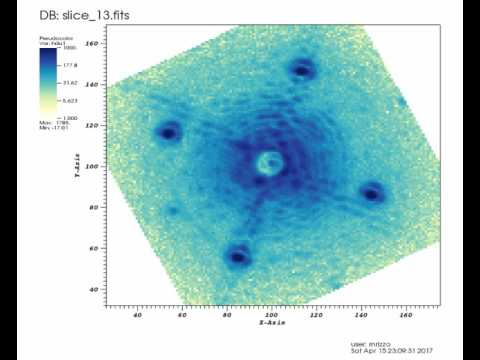

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('bRlC-My14kc', width=600, height=400)


This system shows a companion in the bottom left of the image. Unlike the satellite spots and the stellar PSF, which scale with wavelength, the location of any off-axis source (in this case, the companion) stays the same across the wavelengths.

### Load the cube with Python

Each cube slice corresponds to a different wavelength. One can retrieve the wavelength of each slice from the header using LAM_MIN, LAM_MAX, and DLOGLAM, with the understanding that the wavelengths are evenly sampled in log-space. In Python the header, cube, and inverse variance can be loaded as follows, and the wavelength array generated from it:

In [ ]:
from astropy.io import fits
import numpy as np

### Note the order in which the extensions are laid out
hdulist = fits.open("myfile.fits")
hdr = hdulist[0].header # hdu[0] contains no data
cube = hdulist[1].data
ivar = hdulist[2].data
rawdata_header = hdulist[3].header
lam = hdr['lam_min']*np.exp(np.arange(cube.shape[0])*hdr['dloglam'])
